<h1 style='text-align:center'> Exploring and Modelling Water Based Environmental Threats</h1>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

In [129]:
water_data_path = '../Enviro Lynx Data/WaterData.csv'
df = pd.read_csv(water_data_path)

In [9]:
# x-axis
years = np.array(df['Year'])
ryears = years.reshape(-1,1)

In [4]:
df.head()

,Year,Population Density,Temp (C),PH scale,Seawater CO2
0,1988,40.063764,26.283,8.1292,330.9
1,1989,40.760695,25.659,8.1193,330.6
2,1989,40.760695,24.610,8.1113,324.3
3,1989,40.760695,23.479,8.1091,310.9
4,1989,40.760695,24.278,8.1113,317.7


In [5]:
df.tail()

,Year,Population Density,Temp (C),PH scale,Seawater CO2
297,2018,59.617881,24.242,8.0649,365.1
298,2018,59.617881,25.916,8.0680,385.4
299,2018,59.617881,25.836,8.0675,386.1
300,2018,59.617881,27.180,8.0729,397.3
301,2018,59.617881,26.570,8.0812,382.8


In [36]:
temp = df['Temp (C)']
temp = temp.replace(-999., 25)

In [130]:
# Dataframe removing all unreasonable values
#clean = df.loc
#df.drop(clean[df['Temp (C)'] == -999.].index, inplace=True)

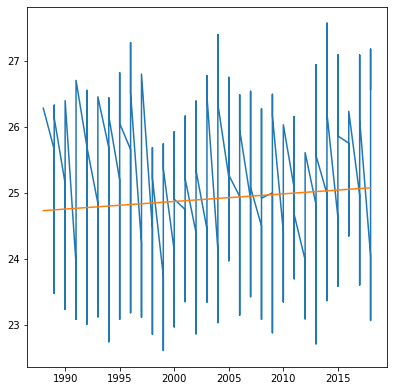

In [131]:
# Ocean Temperature
ocean_temp = np.array(temp)
fig = plt.figure(figsize=(1,1))
ax = fig.add_axes([1,1,5,5])
ax.plot(years, ocean_temp)

# Linear model
reg = linear_model.LinearRegression()
reg.fit(ryears, ocean_temp )
plot = ax.plot(years, reg.predict(ryears))

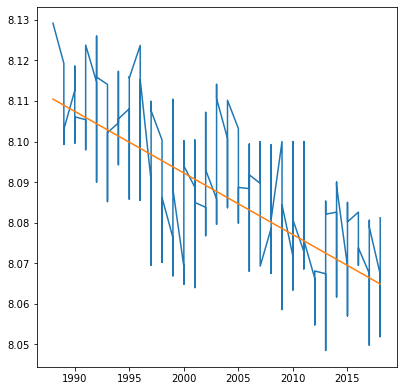

In [135]:
# PH Scale, 2 less ph for some reason
ph = df['PH scale']
ph = ph.replace(-999., 8.1)
ph_arr = np.array(ph)
fig = plt.figure(figsize=(1,1))
ax = fig.add_axes([1,1,5,5])
plot = ax.plot(years, ph_arr)

# Linear model
reg = linear_model.LinearRegression()
reg.fit(ryears, ph_arr)
plot = ax.plot(years, reg.predict(ryears))

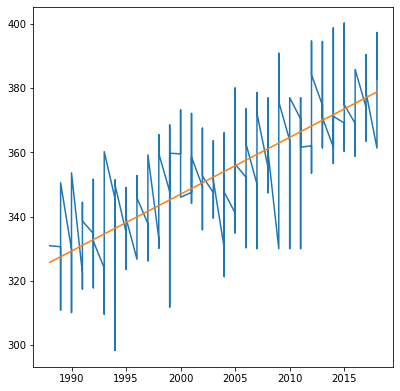

In [137]:
# Seawater CO2
seawater = df.iloc[:, 4] # ppm
seawater = seawater.replace(-999., 330)
seawater_carbon = np.array(seawater)
fig = plt.figure(figsize=(1,1))
ax = fig.add_axes([1,1,5,5])
plot = ax.plot(years, seawater_carbon)

# Linear model
reg = linear_model.LinearRegression()
reg.fit(ryears, seawater_carbon)
plot = ax.plot(years, reg.predict(ryears))